In [1]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data file
sal_df = sal_df = pd.read_csv(r'C:\Users\Narasimhan\Downloads\SF_salary_data_gender.csv',low_memory=False)

In [3]:
# check the head of the dataframe

sal_df.head()

,Unnamed: 0,Id,Employee Name,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,gender
0,0,1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,m
1,1,2,gary jimenez,captain iii (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,m
2,2,3,albert pardini,captain iii (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,m
3,3,4,christopher chong,wire rope cable maintenance mechanic,77916,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,m
4,4,5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,m


In [4]:
#Drop Notse column as it is empty

sal_df.drop(columns=['Notes'])

,Unnamed: 0,Id,Employee Name,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,gender
0,0,1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN,m
1,1,2,gary jimenez,captain iii (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN,m
2,2,3,albert pardini,captain iii (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN,m
3,3,4,christopher chong,wire rope cable maintenance mechanic,77916,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,NaN,m
4,4,5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148649,148650,roy i,custodian,0,0,0,0,0.00,0.00,2014,San Francisco,PT,m
148650,148650,148651,not provided,not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco,NaN,m
148651,148651,148652,not provided,not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco,NaN,m
148652,148652,148653,not provided,not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco,NaN,m


In [6]:
#Exploratory data analysis
#Top 5 highest paying jobs

print(sal_df[[ 'JobTitle' ,'TotalPayBenefits']].sort_values('TotalPayBenefits', ascending=False).nlargest(5,'TotalPayBenefits'))

                                              JobTitle  TotalPayBenefits
0       general manager-metropolitan transit authority         567595.43
1                      captain iii (police department)         538909.28
110531                                  deputy chief 3         510732.68
110532                               asst med examiner         479652.21
110533                        chief investment officer         436224.36


Text(0, 0.5, 'Salaries')

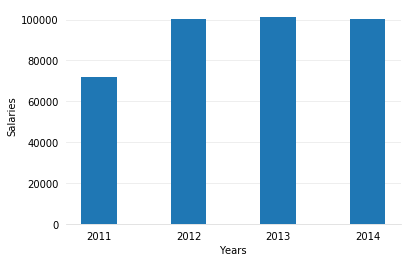

In [8]:
#Average salary over the years
avg_sal_list = []
lis = [2011,2012,2013,2014]
    
for itr in range(len(lis)):
    temp = sal_df[sal_df['Year']==lis[itr]]['TotalPayBenefits'].mean()
    avg_sal_list.append(temp)
       
        
ax = plt.subplot()
    
ax.bar(lis,avg_sal_list,width=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
    
ax.tick_params(bottom=False, left=False)
    
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EAEAEA')
ax.xaxis.grid(False)
ax.set_xticks(lis)
ax.set_xlabel('Years')
ax.set_ylabel('Salaries')

In [10]:
#Maximum salary yearwise
print("Maximum Salary Year wise\n", sal_df.groupby('Year')['TotalPayBenefits'].max())

Maximum Salary Year wise
 Year
2011    567595.43
2012    407274.78
2013    425815.28
2014    510732.68
Name: TotalPayBenefits, dtype: float64


In [11]:
#Most common/rare jobs over years
print("Top 5 common jobs over years 2011-2014",sal_df.groupby('Year')['JobTitle'].apply(lambda x: x.value_counts().nlargest(5)))
print("Top 5 rare jobs over years 2011-2014",sal_df.groupby('Year')['JobTitle'].apply(lambda x: x.value_counts().nsmallest(5)))

Top 5 common jobs over years 2011-2014 Year                              
2011  transit operator                2388
      special nurse                   1402
      registered nurse                1219
      custodian                        796
      firefighter                      794
2012  transit operator                2262
      special nurse                   1466
      registered nurse                1271
      police officer 3                 864
      custodian                        825
2013  transit operator                2295
      special nurse                   1445
      registered nurse                1231
      public svc aide-public works     859
      custodian                        789
2014  transit operator                2479
      special nurse                   1478
      registered nurse                1234
      public svc aide-public works     916
      firefighter                      815
Name: JobTitle, dtype: int64
Top 5 rare jobs over years 2011-2014 

Text(0, 0.5, 'Number of jobs')

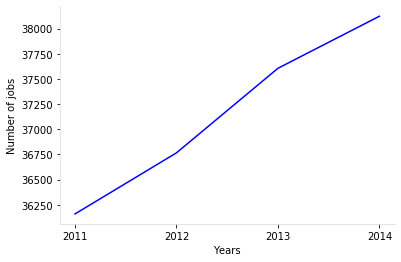

In [12]:
#Job rate yearwise
#print(sal_df.groupby('Year')['JobTitle'].count())
num_jobs = []
for itr in range(len(lis)):
    temp = sal_df[sal_df['Year']==lis[itr]]['JobTitle'].count()
    num_jobs.append(temp)

ax = plt.subplot()
ax.plot(lis,num_jobs,color='blue')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
    
ax.set_xticks(lis)
ax.set_xlabel('Years')
ax.set_ylabel('Number of jobs')

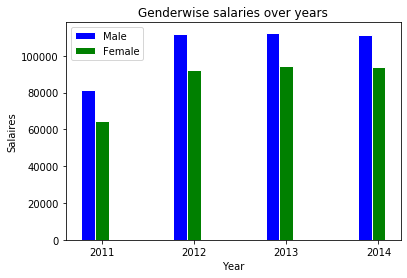

In [15]:
#Comparison of salaries between gender
import numpy as np
gender_df = pd.DataFrame(sal_df.groupby(['gender','Year'])['TotalPayBenefits'].mean(),columns=['TotalPayBenefits']).reset_index() 
male_list = gender_df[(gender_df['gender'] == 'm') & (gender_df['Year'] >= 2011) & (gender_df['Year'] <= 2014)]['TotalPayBenefits'].tolist()
female_list = gender_df[(gender_df['gender'] == 'f') & (gender_df['Year'] >= 2011) & (gender_df['Year'] <= 2014)]['TotalPayBenefits'].tolist()
    
barWidth = 0.15
groups = 4

r = np.arange(groups)
    
plt.bar(r,male_list,color='b',width=barWidth,edgecolor='white', label='Male')
plt.bar(r+barWidth,female_list,color='g',width=barWidth,edgecolor='white', label='Female')
    
plt.xlabel('Year')
plt.ylabel('Salaires')
plt.title('Genderwise salaries over years')
plt.xticks(r + barWidth,('2011','2012','2013','2014'))
plt.legend()
plt.show()

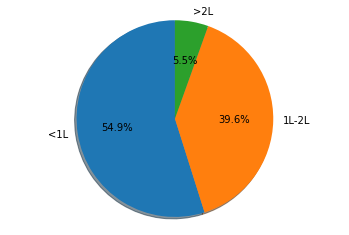

In [16]:
#Employees classification based on Salaries 
salaries_list = []
salaries_list.append(((sal_df[(sal_df['TotalPayBenefits'] >0) & (sal_df['TotalPayBenefits'] <=100000)]['Employee Name'].count())/148654)*100)
salaries_list.append(((sal_df[(sal_df['TotalPayBenefits'] >100000) & (sal_df['TotalPayBenefits'] <=200000)]['Employee Name'].count())/148654)*100)
salaries_list.append(((sal_df[(sal_df['TotalPayBenefits'] >200000)]['Employee Name'].count())/148654)*100)
    
lables = ['<1L','1L-2L','>2L']
explode = (0,0,0)
    
fig1, ax1 = plt.subplots()
ax1.pie(salaries_list, explode=explode, labels=lables, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

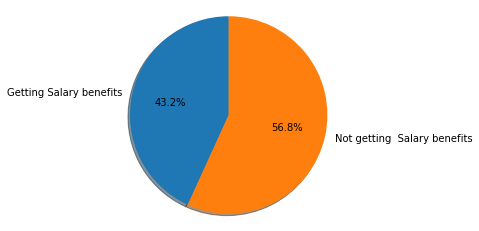

In [18]:
#How many jobs pay salary benefits other than base pay

#Fill 'Not Provided' values in the oay related columns with 0
sal_df['BasePay'].replace({'Not Provided': '0'},inplace=True)
sal_df['OvertimePay'].replace({'Not Provided': '0'},inplace=True)
sal_df['OtherPay'].replace({'Not Provided': '0'},inplace=True)
sal_df['Benefits'].replace({'Not Provided': '0'},inplace=True)
sal_df = sal_df.astype({"BasePay": float,"OvertimePay": float,
    "OtherPay": float,"Benefits": float})
    
bpay_list = []
bpay_list.append(((sal_df[(sal_df['OvertimePay']!=0) & (sal_df['OtherPay']!=0)
    & (sal_df['Benefits']!=0)]['JobTitle'].count())/148654)*100)
bpay_list.append((100-((sal_df[(sal_df['OvertimePay']!=0) & (sal_df['OtherPay']!=0)
    &(sal_df['Benefits']!=0)]['JobTitle'].count())/148654)*100))
    
lables2 = ['Getting Salary benefits','Not getting  Salary benefits']
explode2 = (0,0)
    
fig, ax = plt.subplots()
ax.pie(bpay_list, explode=explode2, labels=lables2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.show()

Text(0.5, 1, 'Correlation between pays')

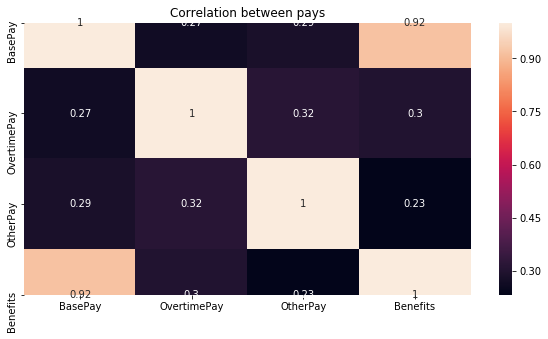

In [20]:
#Check if there is any correlation between Base pay and other salary perks
plt.subplots(figsize=(10,5))
sns.heatmap(sal_df[['BasePay','OvertimePay','OtherPay','Benefits']].corr(),annot=True)
plt.title('Correlation between pays')

In [23]:
#Identifying jobs which has better pay structure
sal_df['SalPerks'] = sal_df['OvertimePay'] + sal_df['OtherPay'] + sal_df['Benefits']
print("Number of jobs which has benefits pays higher than base pay:",sal_df[sal_df['SalPerks'] > sal_df['BasePay']]['JobTitle'].nunique())

Number of jobs which has benefits pays higher than base pay: 461
